In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#reading the datset
df_train=pd.read_csv('/content/drive/MyDrive/Aegis/Hackathon/ICR-Identity Age Related Conditions /DataSet/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Aegis/Hackathon/ICR-Identity Age Related Conditions /DataSet/test.csv')

In [3]:
df_train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
#making shallow copy of the orginal datset
df=df_train.copy()

#Data Preprocessing

In [5]:
#printing the information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [6]:
#checking how many null values in the data
df.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

<Axes: >

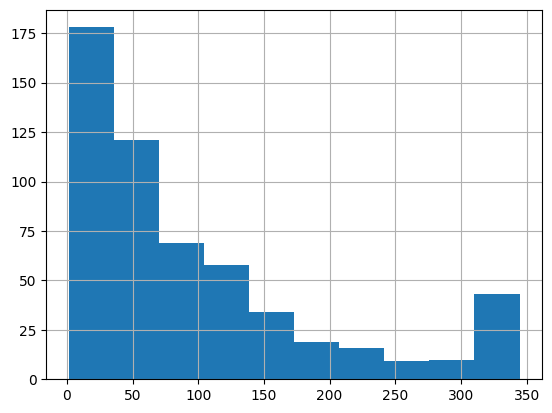

In [7]:
df['BQ'].hist()

In [8]:
df['BQ'].skew()

1.3807463803846622

<Axes: >

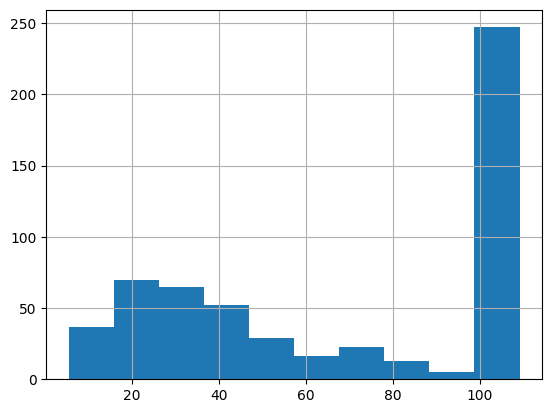

In [9]:
df['EL'].hist()

In [10]:
df['EL'].skew()

-0.14701696949535412

In [11]:
null_cols_numeric=[]
null_cols_categorical=[]
for i in df.columns:
    if df[i].isnull().sum()>0 and df[i].dtype!='object':
        null_cols_numeric.append(i)
    elif df[i].isnull().sum()>0 and df[i].dtype=='object':
        null_cols_categorical.append(i)

In [12]:
null_cols_numeric

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']

In [13]:
null_cols_categorical

[]

In [14]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(missing_values=np.nan,strategy='mean')
df[null_cols_numeric]=pd.DataFrame(imputer1.fit_transform(df[null_cols_numeric]))

In [15]:
df.isna().any()

Id       False
AB       False
AF       False
AH       False
AM       False
AR       False
AX       False
AY       False
AZ       False
BC       False
BD       False
BN       False
BP       False
BQ       False
BR       False
BZ       False
CB       False
CC       False
CD       False
CF       False
CH       False
CL       False
CR       False
CS       False
CU       False
CW       False
DA       False
DE       False
DF       False
DH       False
DI       False
DL       False
DN       False
DU       False
DV       False
DY       False
EB       False
EE       False
EG       False
EH       False
EJ       False
EL       False
EP       False
EU       False
FC       False
FD       False
FE       False
FI       False
FL       False
FR       False
FS       False
GB       False
GE       False
GF       False
GH       False
GI       False
GL       False
Class    False
dtype: bool

In [16]:
df['EJ'].unique()

array(['B', 'A'], dtype=object)

In [17]:
df['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

#Exploratory Data Analysis

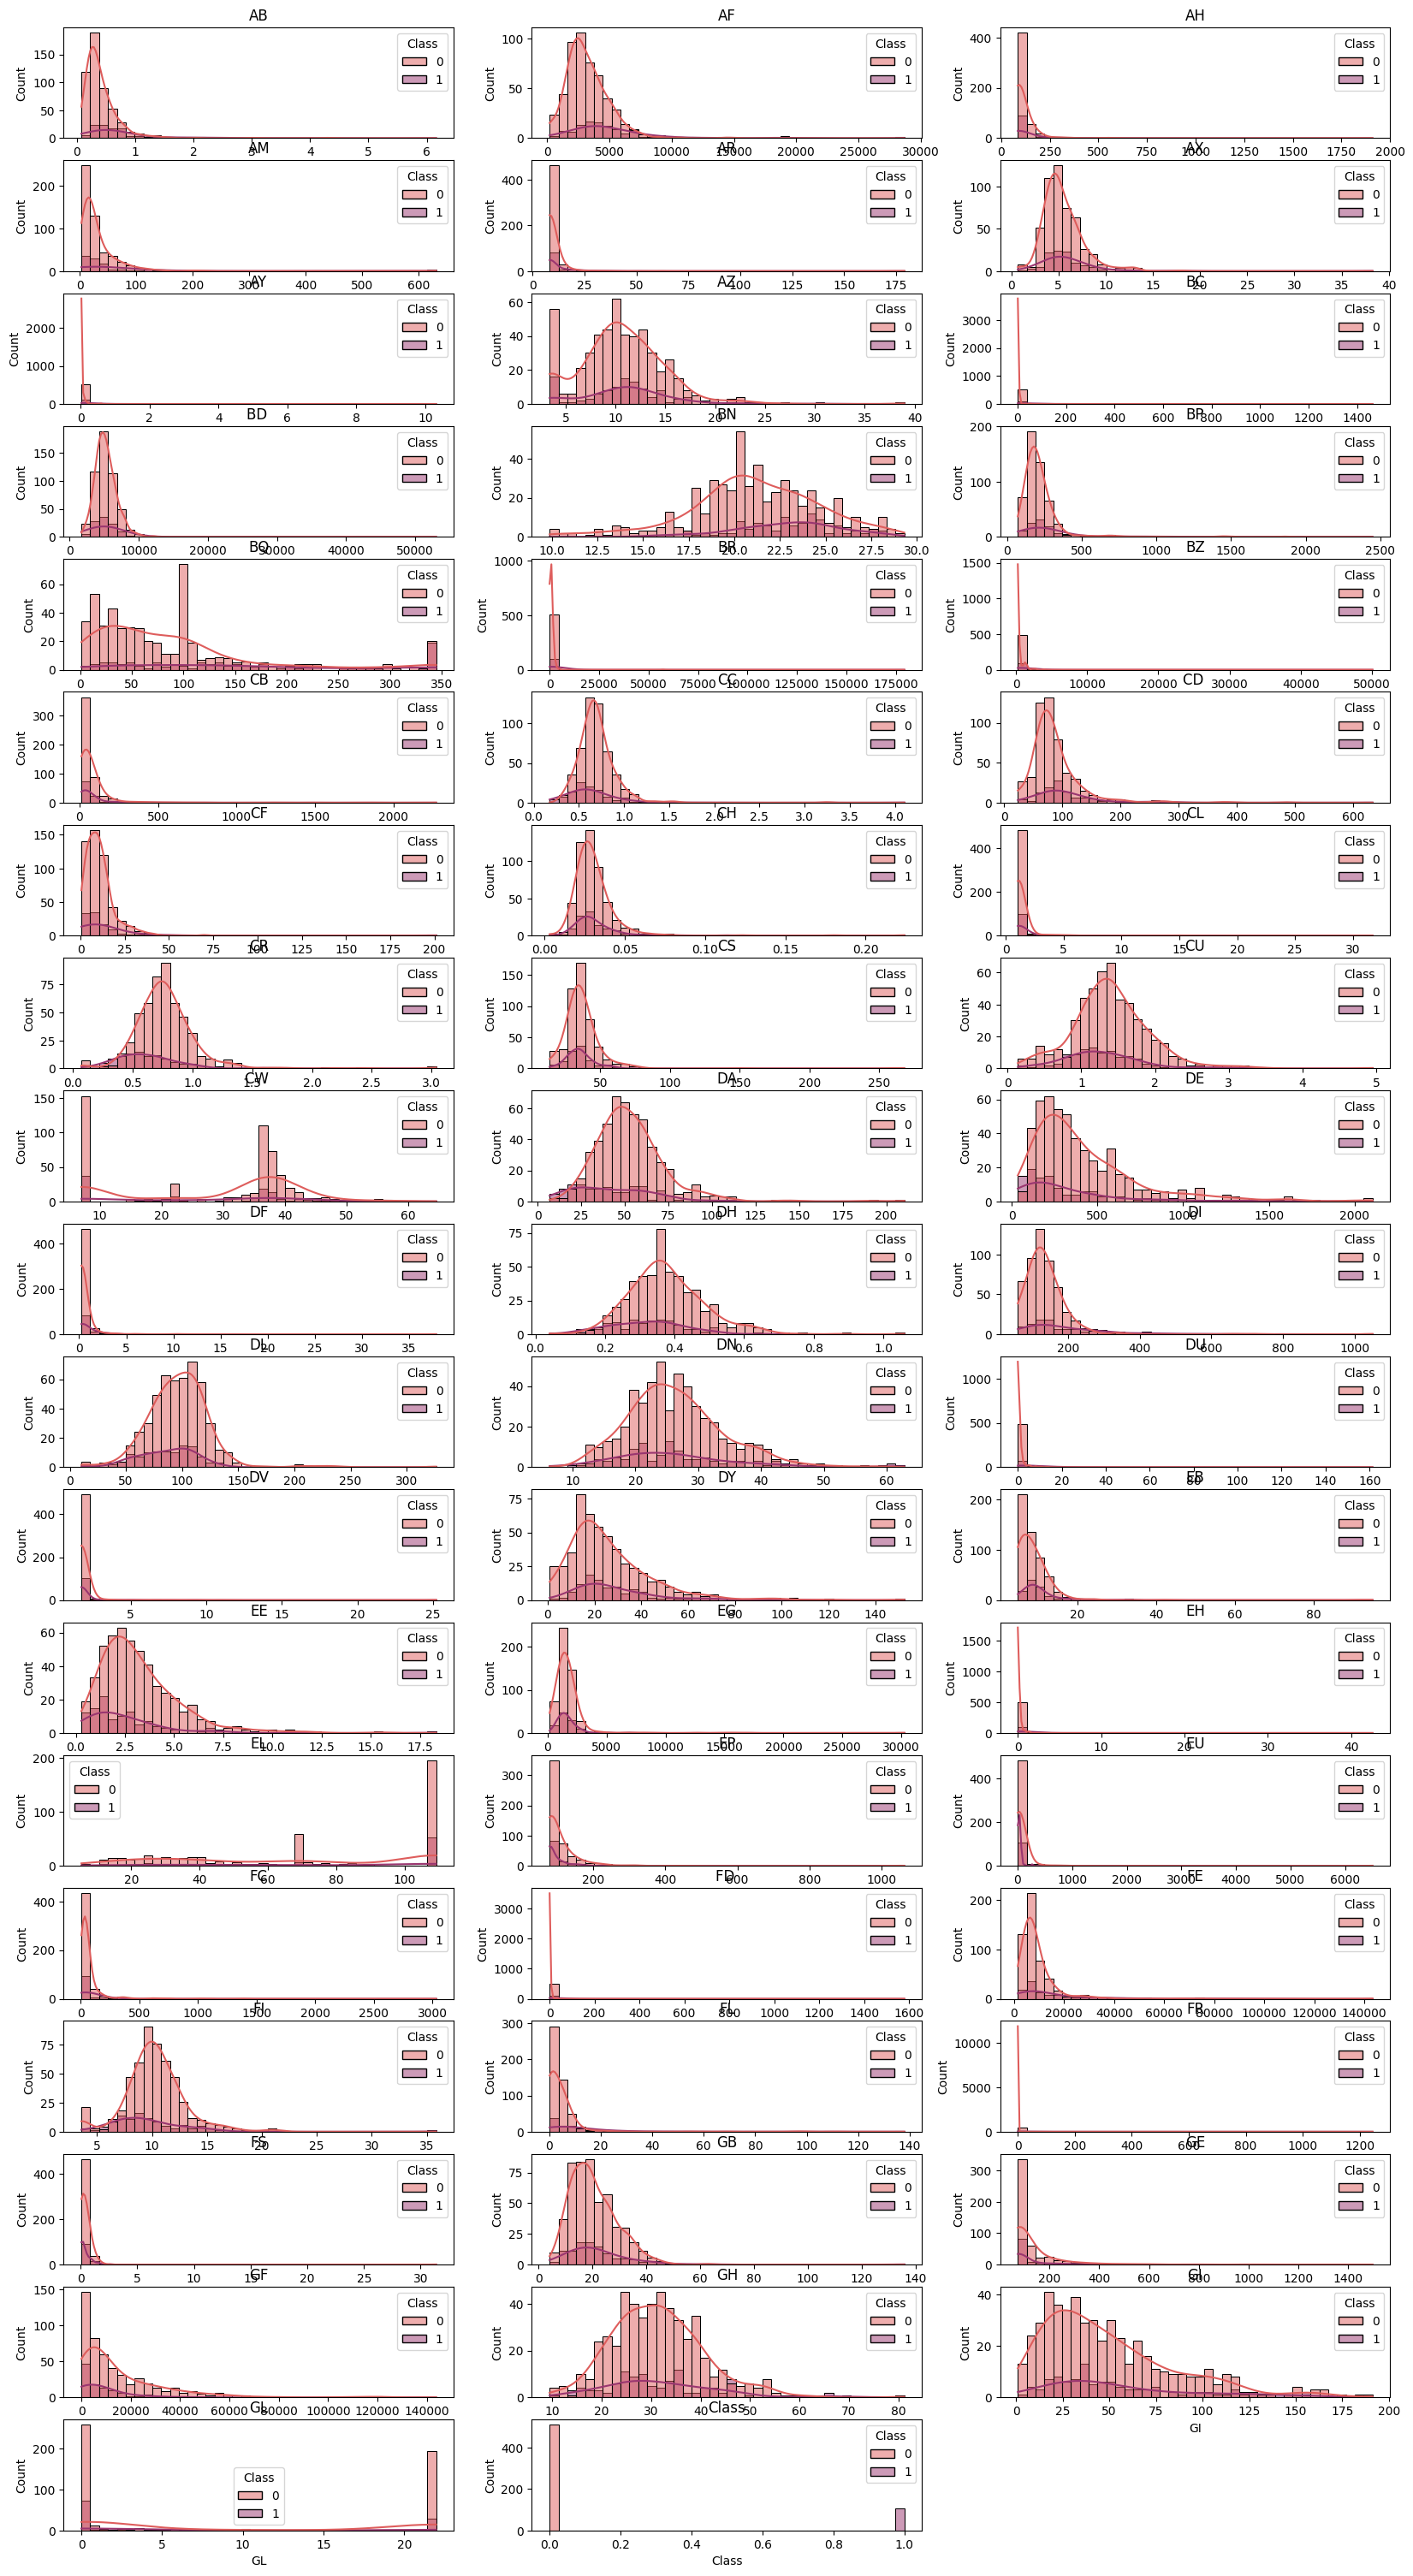

In [18]:
cols=[ 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL','Class']
plt.figure(figsize=(20,40))
for i in range(len(cols)):
    plt.subplot(20,3,i+1)
    #plt.figure(figsize=(3,2))
    sns.histplot(df,x=cols[i],hue='Class',bins=40,kde='True',palette='flare')
    plt.gca().set_title(label=cols[i])
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df['EJ']=le.fit_transform(df['EJ'])

In [21]:
corr=df.corr()
corr

<ipython-input-21-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.000000,0.350231,0.249246,0.530687,0.157712,0.471912,0.011004,0.158569,0.331736,0.278920,...,0.169910,0.017990,0.032191,0.318741,0.003327,-0.017192,0.148456,0.002903,-0.061592,0.280612
AF,0.350231,1.000000,0.044140,0.183961,0.044917,0.248439,0.039417,0.219172,0.058831,0.045430,...,0.148197,0.021009,-0.002983,0.079993,0.076449,-0.159796,0.187105,0.140935,-0.127791,0.302638
AH,0.249246,0.044140,1.000000,0.128268,0.749794,0.039324,0.055385,0.095627,0.366910,0.209508,...,-0.022821,-0.009112,0.018321,0.159666,0.011332,-0.029422,-0.037542,-0.073142,0.029174,0.044645
AM,0.530687,0.183961,0.128268,1.000000,0.175212,0.225382,0.081666,0.131885,0.329658,0.277908,...,0.187942,-0.009183,0.040831,0.217443,-0.012176,-0.019639,0.089008,0.100873,-0.079703,0.239170
AR,0.157712,0.044917,0.749794,0.175212,1.000000,0.011715,0.099947,0.099282,0.073730,-0.002509,...,0.080161,-0.007933,0.068268,0.002816,0.034682,0.027927,-0.120285,0.074428,0.028149,0.064380
AX,0.471912,0.248439,0.039324,0.225382,0.011715,1.000000,0.016315,0.269728,0.079799,0.124581,...,0.020745,-0.014095,0.044932,0.233188,0.099148,0.075500,0.119736,0.046596,-0.004384,0.097616
AY,0.011004,0.039417,0.055385,0.081666,0.099947,0.016315,1.000000,0.036790,0.132495,0.506917,...,-0.027435,-0.002789,-0.010552,0.025665,0.002803,-0.006869,0.196392,0.022473,0.067402,0.082420
AZ,0.158569,0.219172,0.095627,0.131885,0.099282,0.269728,0.036790,1.000000,0.036424,0.135976,...,-0.050644,-0.010384,0.020461,0.223358,0.016947,0.218551,0.111962,0.067379,0.112818,0.013516
BC,0.331736,0.058831,0.366910,0.329658,0.073730,0.079799,0.132495,0.036424,1.000000,0.753051,...,-0.018865,0.034514,0.018158,0.419790,0.052096,-0.043482,0.128950,-0.020755,0.041742,0.155882
BD,0.278920,0.045430,0.209508,0.277908,-0.002509,0.124581,0.506917,0.135976,0.753051,1.000000,...,-0.008829,-0.010248,0.021643,0.439534,-0.003691,0.005017,0.212123,-0.009943,0.020934,0.112184


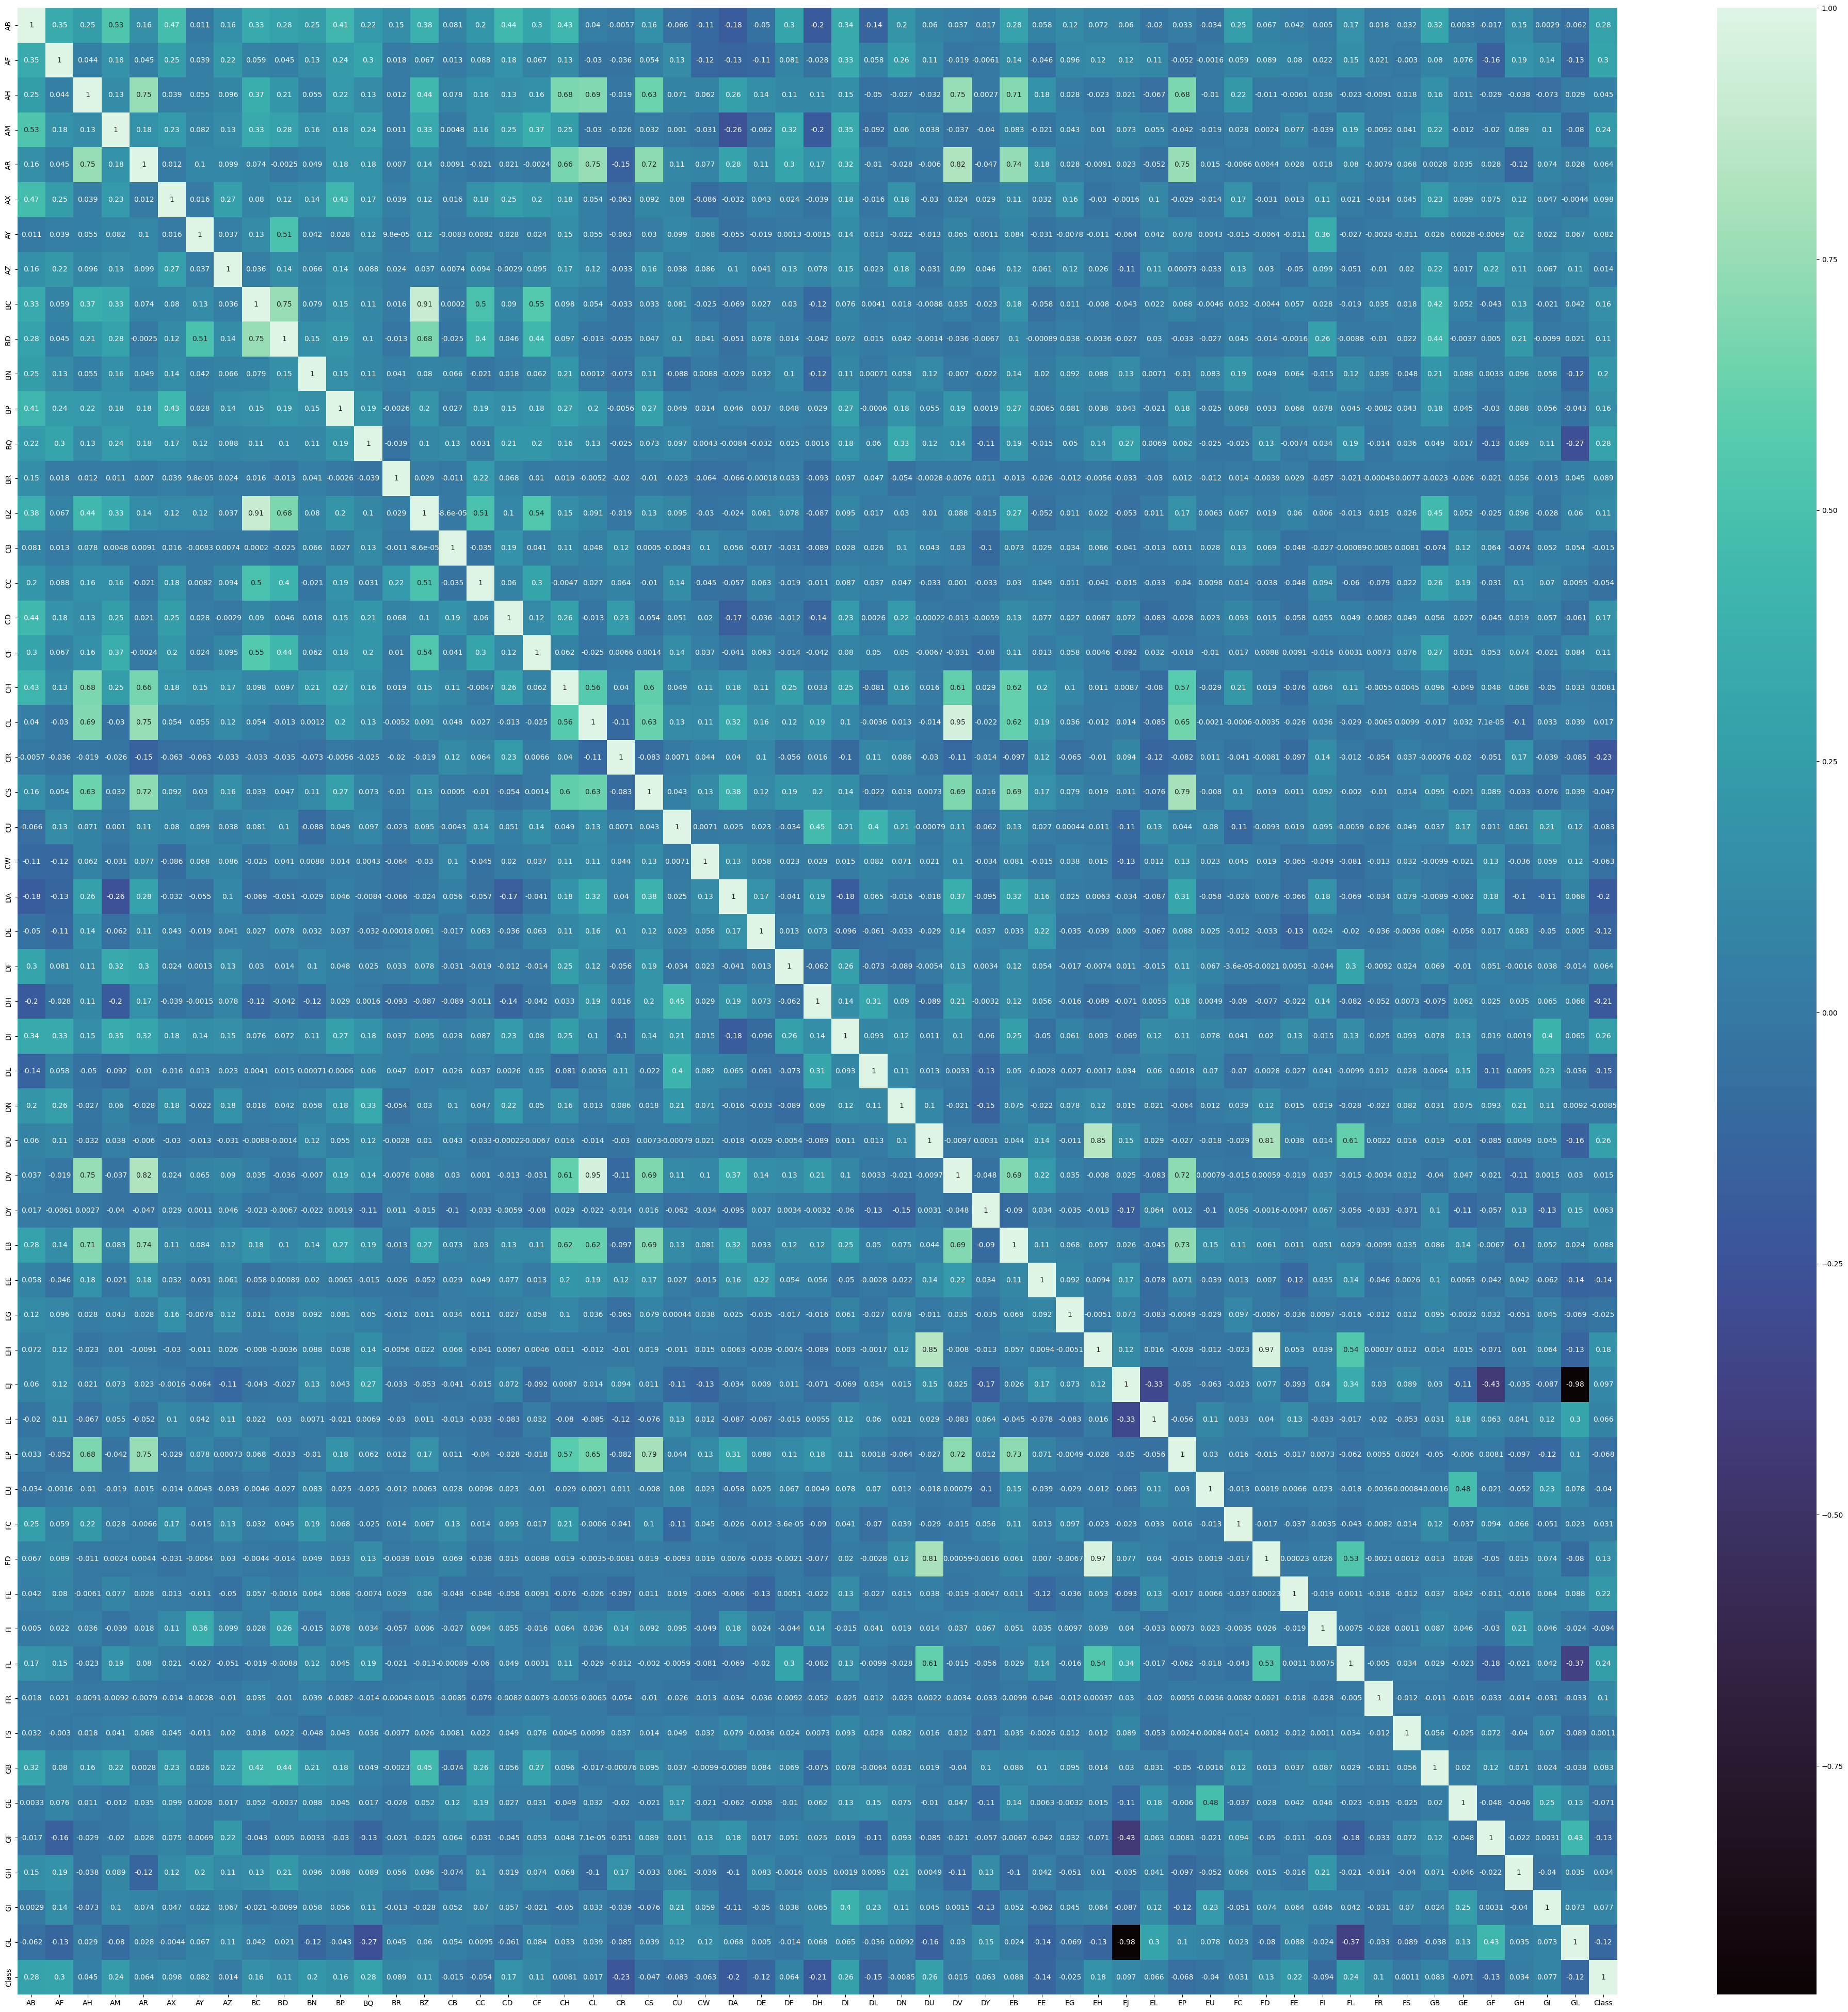

In [22]:
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True,cmap='mako')
plt.show()

In [23]:
A=['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ','Class']
B=['BC', 'BD ', 'BN','BP', 'BQ', 'BR', 'BZ','Class']
C=['CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS','CU', 'CW ','Class']
D=['DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY','Class']
E=['EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU','Class']
F=['FC', 'FD ', 'FE', 'FI','FL', 'FR', 'FS','Class']
G=['GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class']
all_cols=[A,B,C,D,E,F,G]

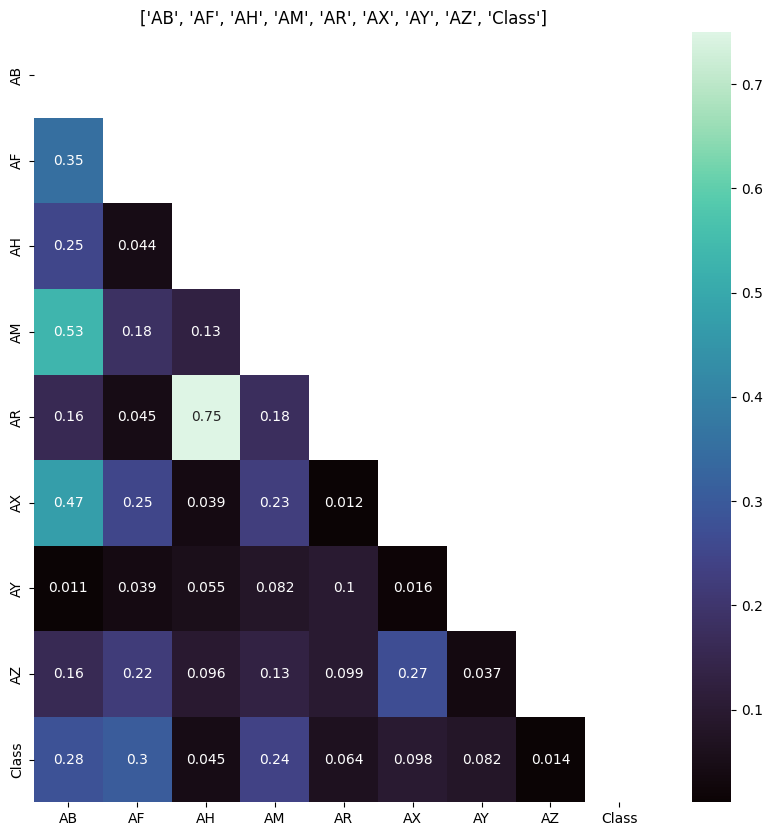

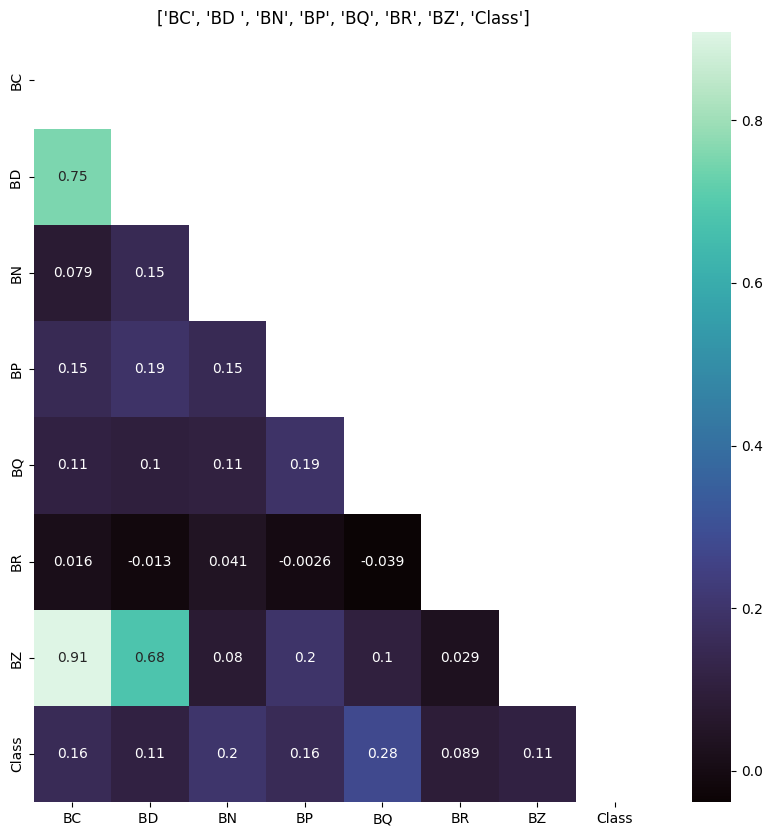

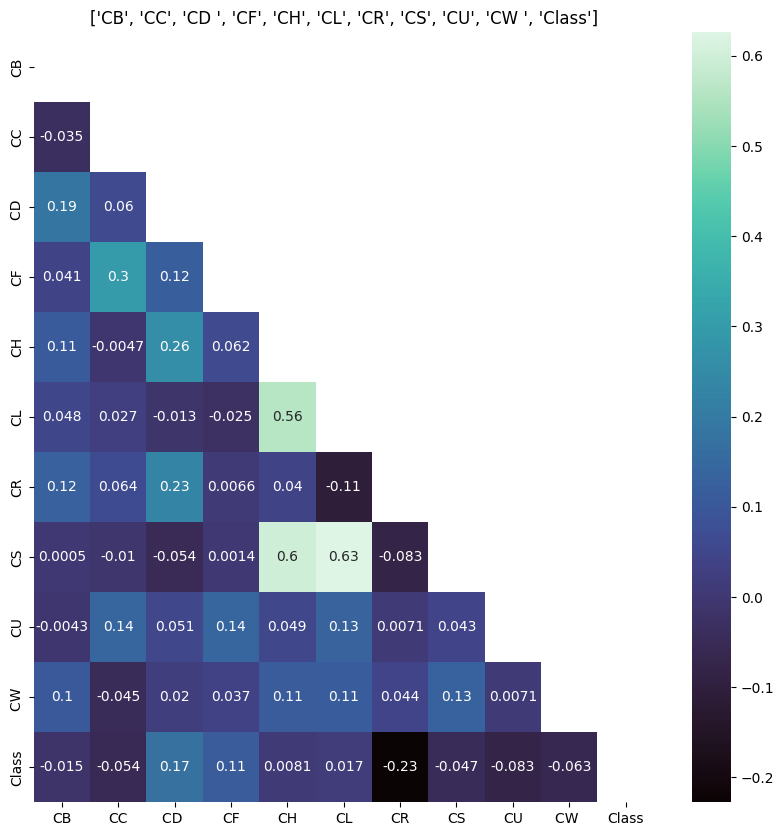

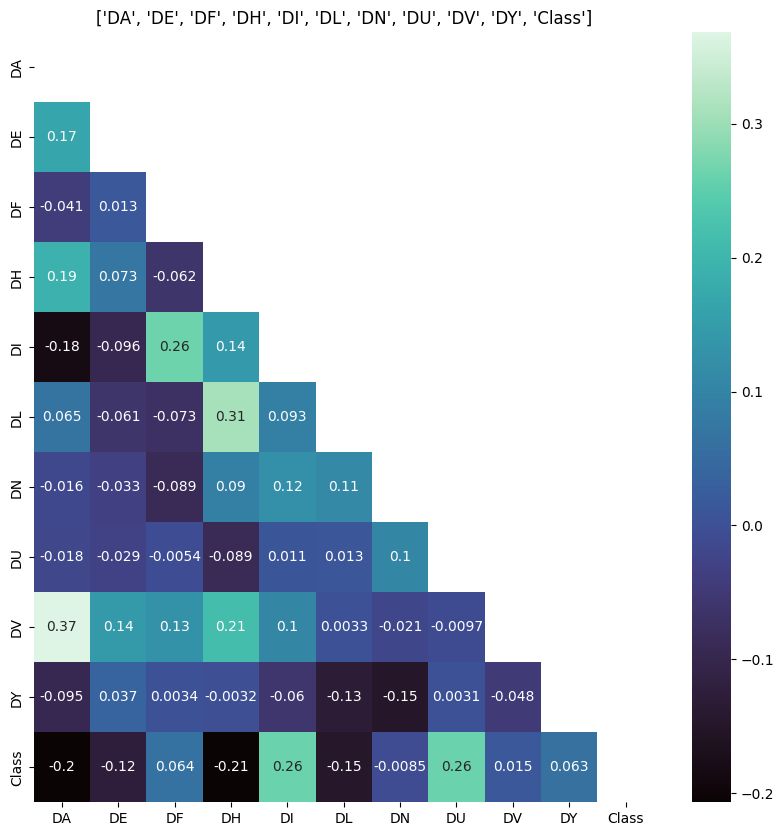

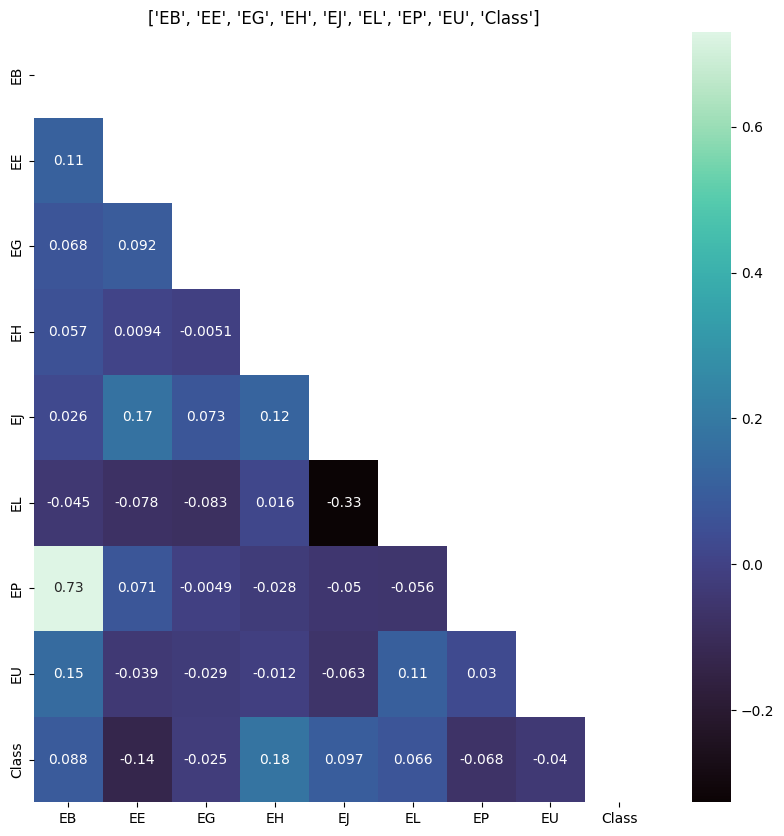

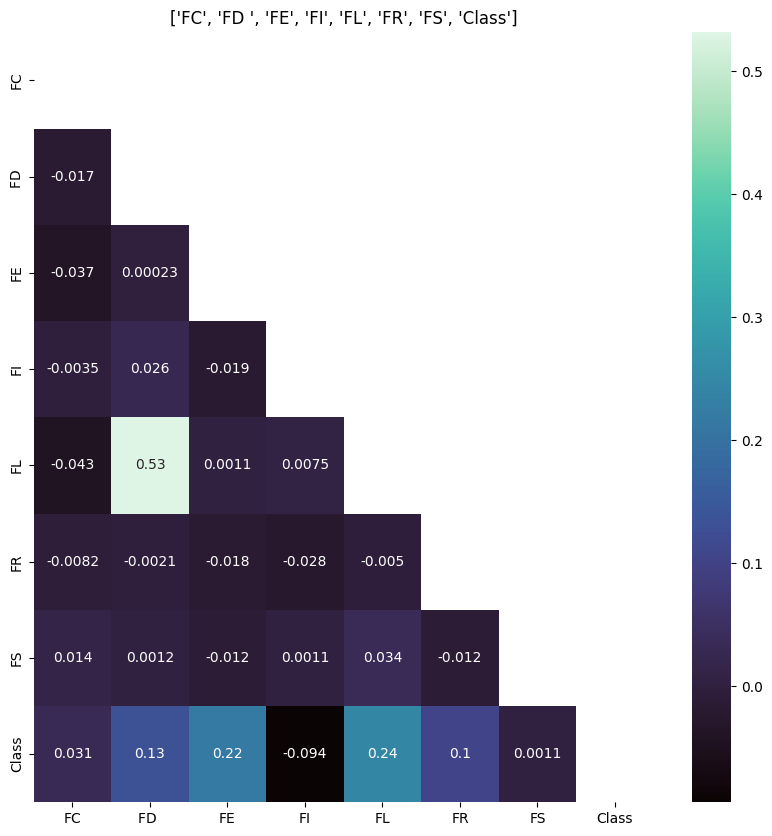

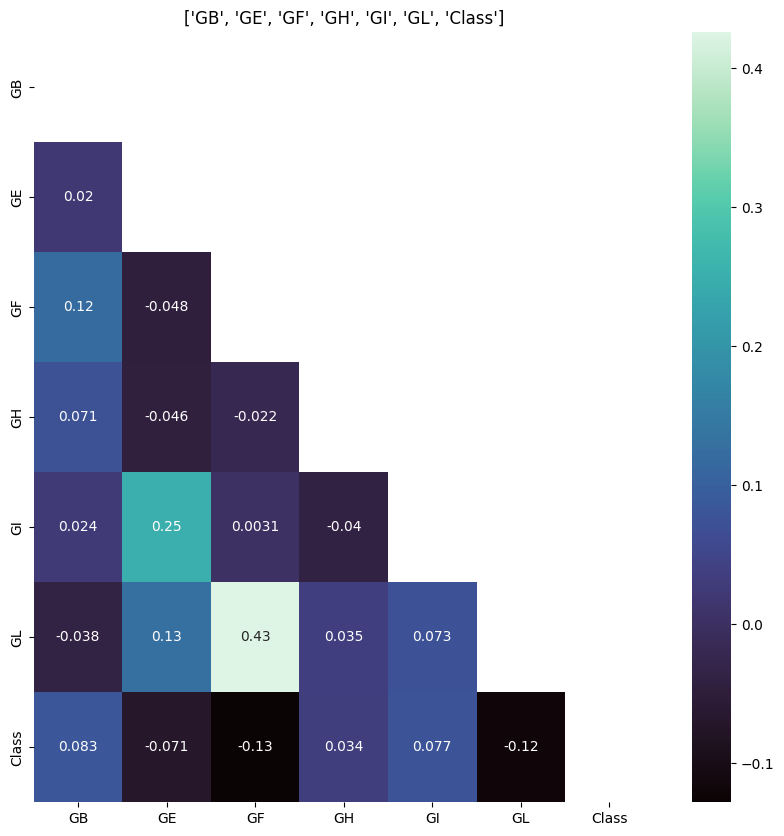

In [24]:
a=1
for i in all_cols:
    plt.figure(figsize=(10,10))
    corr=df[i].corr()
    sns.heatmap(corr,annot=True,cmap='mako',mask=np.triu(corr)).set_title(i)
    plt.show()

#Feature Selection


In [25]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [26]:
X

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.910227,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,12.029366,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000
615,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,4517.86560,...,8.026928,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622


In [27]:
y

0      1
1      0
2      0
3      0
4      1
      ..
612    0
613    0
614    0
615    0
616    0
Name: Class, Length: 617, dtype: int64

#Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1,stratify=y)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [30]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
score_list1=pd.DataFrame()

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [33]:
Dt=DecisionTreeClassifier()
LR=LogisticRegression()
Rfc=RandomForestClassifier()
Knn=KNeighborsClassifier(n_neighbors=5)
NB=GaussianNB()
svc=SVC()

In [34]:
Dt.fit(X_train,y_train)
LR.fit(X_train,y_train)
Rfc.fit(X_train,y_train)
Knn.fit(X_train,y_train)
NB.fit(X_train,y_train)
svc.fit(X_train,y_train)

SVC()

In [35]:
y_pred_dt=Dt.predict(X_test)
y_pred_LR=LR.predict(X_test)
y_pred_Rfc=Rfc.predict(X_test)
y_pred_Knn=Knn.predict(X_test)
y_pred_NB=NB.predict(X_test)
y_pred_svc=svc.predict(X_test)

In [36]:
print("Decision Tree Classification accuracy =",accuracy_score(y_test,y_pred_dt))
print("****************************************************************")
print("Logistic Regression accuracy =",accuracy_score(y_test,y_pred_LR))
print("****************************************************************")
print("Random Forest Classification accuracy =",accuracy_score(y_test,y_pred_Rfc))
print("****************************************************************")
print("K Nearest Neighbors accuracy =",accuracy_score(y_test,y_pred_Knn))
print("****************************************************************")
print("Naive Bayes accuracy =",accuracy_score(y_test,y_pred_NB))
print("****************************************************************")
print("Support Vector Machine Classifier accuracy =",accuracy_score(y_test,y_pred_svc))

Decision Tree Classification accuracy = 0.8709677419354839
****************************************************************
Logistic Regression accuracy = 0.8817204301075269
****************************************************************
Random Forest Classification accuracy = 0.9247311827956989
****************************************************************
K Nearest Neighbors accuracy = 0.9032258064516129
****************************************************************
Naive Bayes accuracy = 0.8602150537634409
****************************************************************
Support Vector Machine Classifier accuracy = 0.9139784946236559


In [37]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters and the best model's accuracy
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Model Accuracy: 0.9197985347985348
Test Set Accuracy: 0.9247311827956989


In [38]:
score_list1['rmf']=[i[1] for i in best_rf_model.predict_proba(X_test)]

In [39]:
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion: Gini impurity or Information gain
    'max_depth': [None, 5, 10, 20],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

# Print the best hyperparameters and the best model's accuracy
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
test_accuracy = best_dt_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Model Accuracy: 0.898846153846154
Test Set Accuracy: 0.8817204301075269


In [40]:
svc_classifier = SVC()

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type: Linear or Radial Basis Function (RBF)
    'gamma': ['scale', 'auto']    # Kernel coefficient for 'rbf': 'scale' (1 / n_features) or 'auto' (1 / n_samples)
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

# Print the best hyperparameters and the best model's accuracy
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
test_accuracy = best_svc_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Model Accuracy: 0.8950366300366301
Test Set Accuracy: 0.9247311827956989


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
xgb.fit(X_train,y_train)

GradientBoostingClassifier()

In [42]:
y_pred_xgb=xgb.predict(X_test)

In [43]:
print("XGBoost Classifier accuracy =",accuracy_score(y_test,y_pred_xgb))

XGBoost Classifier accuracy = 0.9247311827956989


In [44]:
from xgboost import XGBClassifier



XGB=XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
pred_XGB=XGB.predict(X_test)

In [46]:
print("XGB accuracy =",accuracy_score(y_test,pred_XGB))
score_list1['xgb']=[i[1] for i in XGB.predict_proba(X_test)]

XGB accuracy = 0.946236559139785


In [47]:
from lightgbm import LGBMClassifier
LGB=LGBMClassifier()
LGB.fit(X_train,y_train)

LGBMClassifier()

In [48]:
pred_LGB=LGB.predict(X_test)

In [49]:
print("LightGBM accuracy =",accuracy_score(y_test,pred_LGB))
score_list1['lgb']=[i[1] for i in LGB.predict_proba(X_test)]

LightGBM accuracy = 0.9354838709677419


In [50]:
print("**************************************")
print("Score List")
print(score_list1)

**************************************
Score List
         rmf       xgb       lgb
0   0.069390  0.002398  0.000718
1   0.088619  0.000960  0.000106
2   0.657289  0.899810  0.953100
3   0.007635  0.000117  0.000028
4   0.155595  0.002800  0.008368
..       ...       ...       ...
88  0.011162  0.000601  0.000164
89  0.006126  0.000381  0.000028
90  0.117140  0.003664  0.006215
91  0.045072  0.001814  0.002897
92  0.020591  0.003659  0.001700

[93 rows x 3 columns]


In [51]:
weights = LogisticRegression(random_state = 42).fit(score_list1, y_test).coef_[0]

In [52]:
pd.DataFrame(weights, index = score_list1.columns, columns = ['weight per model'])

,weight per model
rmf,1.219412
xgb,2.095543
lgb,1.735628


In [53]:
models=[
    ('xgb',XGB),
    ('lgb',LGB),
    ('best_rf_model',best_rf_model)
]

In [54]:
from sklearn.ensemble import VotingClassifier
VTC=VotingClassifier(models,weights=weights,voting='soft')

In [55]:
VTC.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('lgb', LGBMClassifier()),
                             ('best_rf_model',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=10,
                                                     n_estimators=50))],
                 voting='soft',
                 weights=array([1.21941222, 2.09554293, 1.73562782]))

In [56]:
pred_VTC=VTC.predict(X_test)
print("Voting Classifier accuracy =",accuracy_score(y_test,pred_VTC))

Voting Classifier accuracy = 0.946236559139785


#Make_Prediction

In [57]:
df_test.isnull().sum()

Id     0
AB     0
AF     0
AH     0
AM     0
AR     0
AX     0
AY     0
AZ     0
BC     0
BD     0
BN     0
BP     0
BQ     0
BR     0
BZ     0
CB     0
CC     0
CD     0
CF     0
CH     0
CL     0
CR     0
CS     0
CU     0
CW     0
DA     0
DE     0
DF     0
DH     0
DI     0
DL     0
DN     0
DU     0
DV     0
DY     0
EB     0
EE     0
EG     0
EH     0
EJ     0
EL     0
EP     0
EU     0
FC     0
FD     0
FE     0
FI     0
FL     0
FR     0
FS     0
GB     0
GE     0
GF     0
GH     0
GI     0
GL     0
dtype: int64

In [58]:
id=df_test['Id'].values

In [59]:
df_X_test=df_test.iloc[:,1:]


In [60]:
df_X_test['EJ']=le.transform(df_X_test['EJ'])

In [61]:
df_X_test=sc.transform(df_X_test)

In [63]:
final_pred_VTC=VTC.predict_proba(df_X_test)

In [70]:
final_pred_VTC

array([[0.82909145, 0.17090855],
       [0.82909145, 0.17090855],
       [0.82909145, 0.17090855],
       [0.82909145, 0.17090855],
       [0.82909145, 0.17090855]])

In [71]:
final_pred=pd.DataFrame(final_pred_VTC,columns=['class_0','class_1'])

In [73]:
final_pred.insert(0, 'id', id)

In [74]:
final_pred

,id,class_0,class_1
0,00eed32682bb,0.829091,0.170909
1,010ebe33f668,0.829091,0.170909
2,02fa521e1838,0.829091,0.170909
3,040e15f562a2,0.829091,0.170909
4,046e85c7cc7f,0.829091,0.170909


In [75]:
final_pred.to_csv('submission.csv',index=False)